In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

05/20/2020 23:15:47 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/20/2020 23:15:57 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/20/2020 23:16:07 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/20/2020 23:16:16 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/20/2020 23:16:26 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.gz wi

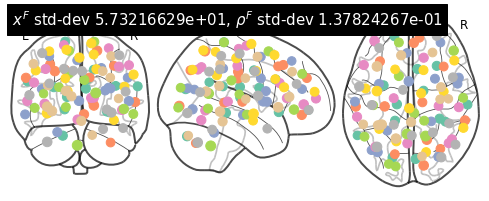

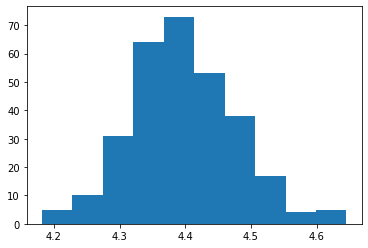

(<nilearn.plotting.displays.OrthoProjector at 0x7fa4db1a2cd0>,
 tensor([[-55.3529, -53.4335,  25.1552],
         [ 28.1662,  19.7527,  -6.2726],
         [ 37.3509, -39.0289,  20.7170],
         [-15.7249, -37.9124,  67.2789],
         [  7.8291,  16.4770,  27.9242],
         [-18.3124, -76.6918, -31.6785],
         [-16.3678,  50.7953,  -4.1794],
         [  5.9378, -78.2223,  17.8498],
         [-27.7458,  -0.7493,  19.2981],
         [ 60.4977, -20.9936,  20.2470],
         [-13.7995, -20.6567,   9.1223],
         [ 31.1032, -35.7856,  -7.0680],
         [ 14.2774,  -6.3188,  37.7555],
         [-31.6007,  24.5150,  43.2985],
         [ 17.7419, -57.9312,  57.7312],
         [ 31.9656, -67.5341, -38.9068],
         [  9.9370,  49.3208,  29.4723],
         [ 14.3960, -84.9527,   0.1193],
         [  4.0303,  43.9528,  -9.2251],
         [-15.9515, -73.1948,  37.7116],
         [ 35.4252,  19.0437,  41.8340],
         [ 57.8556, -37.5780,   3.6701],
         [ 13.0347, -18.5909,   4.5

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=affvids_db.inference_filter(training=True))

05/20/2020 23:27:32 [Epoch 1] (25663ms) Posterior free-energy 7.39614228e+10 = KL from prior 4.71717500e+06 - log-likelihood -7.39566879e+10
05/20/2020 23:27:32 Saving checkpoint...
05/20/2020 23:27:58 [Epoch 2] (25625ms) Posterior free-energy 7.20340500e+10 = KL from prior 1.07996788e+06 - log-likelihood -7.20329851e+10
05/20/2020 23:28:23 [Epoch 3] (24832ms) Posterior free-energy 7.05217413e+10 = KL from prior 1.01336681e+06 - log-likelihood -7.05207091e+10
05/20/2020 23:28:48 [Epoch 4] (24893ms) Posterior free-energy 6.94532833e+10 = KL from prior 9.64722125e+05 - log-likelihood -6.94523003e+10
05/20/2020 23:29:13 [Epoch 5] (24874ms) Posterior free-energy 6.86828339e+10 = KL from prior 9.37392500e+05 - log-likelihood -6.86818877e+10
05/20/2020 23:29:38 [Epoch 6] (24947ms) Posterior free-energy 6.80871772e+10 = KL from prior 9.16267062e+05 - log-likelihood -6.80862597e+10
05/20/2020 23:30:03 [Epoch 7] (24942ms) Posterior free-energy 6.75818414e+10 = KL from prior 8.91137688e+05 - log

Epoch   677: reducing learning rate of group 0 to 5.0000e-03.
Epoch   677: reducing learning rate of group 1 to 5.0000e-03.
Epoch   677: reducing learning rate of group 2 to 5.0000e-03.
Epoch   677: reducing learning rate of group 3 to 5.0000e-03.


05/21/2020 04:08:19 [Epoch 679] (24963ms) Posterior free-energy 4.99024241e+10 = KL from prior 6.24851700e+06 - log-likelihood -4.98961777e+10
05/21/2020 04:08:44 [Epoch 680] (24791ms) Posterior free-energy 4.96421970e+10 = KL from prior 6.22344550e+06 - log-likelihood -4.96359711e+10
05/21/2020 04:09:09 [Epoch 681] (24762ms) Posterior free-energy 4.96337633e+10 = KL from prior 6.22170750e+06 - log-likelihood -4.96275456e+10
05/21/2020 04:09:34 [Epoch 682] (24763ms) Posterior free-energy 4.96297411e+10 = KL from prior 6.21858800e+06 - log-likelihood -4.96235315e+10
05/21/2020 04:09:58 [Epoch 683] (24772ms) Posterior free-energy 4.96266035e+10 = KL from prior 6.21600200e+06 - log-likelihood -4.96203899e+10
05/21/2020 04:10:23 [Epoch 684] (24803ms) Posterior free-energy 4.96237199e+10 = KL from prior 6.21463200e+06 - log-likelihood -4.96175063e+10
05/21/2020 04:10:48 [Epoch 685] (24749ms) Posterior free-energy 4.96211149e+10 = KL from prior 6.21335450e+06 - log-likelihood -4.96149176e+10

Epoch   849: reducing learning rate of group 0 to 2.5000e-03.
Epoch   849: reducing learning rate of group 1 to 2.5000e-03.
Epoch   849: reducing learning rate of group 2 to 2.5000e-03.
Epoch   849: reducing learning rate of group 3 to 2.5000e-03.


05/21/2020 05:19:31 [Epoch 851] (24739ms) Posterior free-energy 4.95113667e+10 = KL from prior 6.36564150e+06 - log-likelihood -4.95049892e+10
05/21/2020 05:19:56 [Epoch 852] (24781ms) Posterior free-energy 4.94941716e+10 = KL from prior 6.34327350e+06 - log-likelihood -4.94877983e+10
05/21/2020 05:20:21 [Epoch 853] (24765ms) Posterior free-energy 4.94917345e+10 = KL from prior 6.33397450e+06 - log-likelihood -4.94854103e+10
05/21/2020 05:20:46 [Epoch 854] (24806ms) Posterior free-energy 4.94915502e+10 = KL from prior 6.32915400e+06 - log-likelihood -4.94852178e+10
05/21/2020 05:21:10 [Epoch 855] (24849ms) Posterior free-energy 4.94905958e+10 = KL from prior 6.32819350e+06 - log-likelihood -4.94842593e+10
05/21/2020 05:21:35 [Epoch 856] (24885ms) Posterior free-energy 4.94902682e+10 = KL from prior 6.32785350e+06 - log-likelihood -4.94839603e+10
05/21/2020 05:22:00 [Epoch 857] (24817ms) Posterior free-energy 4.94897603e+10 = KL from prior 6.32964500e+06 - log-likelihood -4.94834278e+10

Epoch   879: reducing learning rate of group 0 to 1.2500e-03.
Epoch   879: reducing learning rate of group 1 to 1.2500e-03.
Epoch   879: reducing learning rate of group 2 to 1.2500e-03.
Epoch   879: reducing learning rate of group 3 to 1.2500e-03.


05/21/2020 05:31:57 [Epoch 881] (24760ms) Posterior free-energy 4.94831821e+10 = KL from prior 6.33983300e+06 - log-likelihood -4.94768333e+10
05/21/2020 05:32:21 [Epoch 882] (24770ms) Posterior free-energy 4.94820557e+10 = KL from prior 6.33242650e+06 - log-likelihood -4.94757233e+10
05/21/2020 05:32:46 [Epoch 883] (24710ms) Posterior free-energy 4.94815068e+10 = KL from prior 6.32991050e+06 - log-likelihood -4.94751785e+10
05/21/2020 05:33:11 [Epoch 884] (24777ms) Posterior free-energy 4.94806958e+10 = KL from prior 6.32973850e+06 - log-likelihood -4.94743757e+10
05/21/2020 05:33:36 [Epoch 885] (24761ms) Posterior free-energy 4.94807368e+10 = KL from prior 6.32677150e+06 - log-likelihood -4.94744125e+10
05/21/2020 05:34:01 [Epoch 886] (24772ms) Posterior free-energy 4.94803681e+10 = KL from prior 6.32965950e+06 - log-likelihood -4.94740480e+10
05/21/2020 05:34:25 [Epoch 887] (24771ms) Posterior free-energy 4.94801347e+10 = KL from prior 6.32614800e+06 - log-likelihood -4.94738186e+10

Epoch   916: reducing learning rate of group 0 to 6.2500e-04.
Epoch   916: reducing learning rate of group 1 to 6.2500e-04.
Epoch   916: reducing learning rate of group 2 to 6.2500e-04.
Epoch   916: reducing learning rate of group 3 to 6.2500e-04.


05/21/2020 05:47:15 [Epoch 918] (24862ms) Posterior free-energy 4.94757478e+10 = KL from prior 6.32579950e+06 - log-likelihood -4.94694113e+10
05/21/2020 05:47:40 [Epoch 919] (24887ms) Posterior free-energy 4.94753710e+10 = KL from prior 6.32510400e+06 - log-likelihood -4.94690427e+10
05/21/2020 05:48:05 [Epoch 920] (24864ms) Posterior free-energy 4.94752317e+10 = KL from prior 6.32538250e+06 - log-likelihood -4.94689034e+10
05/21/2020 05:48:30 [Epoch 921] (24845ms) Posterior free-energy 4.94749860e+10 = KL from prior 6.32333500e+06 - log-likelihood -4.94686536e+10
05/21/2020 05:48:55 [Epoch 922] (24957ms) Posterior free-energy 4.94747771e+10 = KL from prior 6.32379300e+06 - log-likelihood -4.94684365e+10
05/21/2020 05:49:20 [Epoch 923] (24919ms) Posterior free-energy 4.94744494e+10 = KL from prior 6.32676250e+06 - log-likelihood -4.94681129e+10
05/21/2020 05:49:45 [Epoch 924] (24973ms) Posterior free-energy 4.94744494e+10 = KL from prior 6.32285900e+06 - log-likelihood -4.94681293e+10

Epoch   937: reducing learning rate of group 0 to 3.1250e-04.
Epoch   937: reducing learning rate of group 1 to 3.1250e-04.
Epoch   937: reducing learning rate of group 2 to 3.1250e-04.
Epoch   937: reducing learning rate of group 3 to 3.1250e-04.


05/21/2020 05:55:57 [Epoch 939] (24746ms) Posterior free-energy 4.94733763e+10 = KL from prior 6.32112300e+06 - log-likelihood -4.94670479e+10
05/21/2020 05:56:21 [Epoch 940] (24784ms) Posterior free-energy 4.94729052e+10 = KL from prior 6.32416750e+06 - log-likelihood -4.94665851e+10
05/21/2020 05:56:46 [Epoch 941] (24739ms) Posterior free-energy 4.94729380e+10 = KL from prior 6.32406700e+06 - log-likelihood -4.94666138e+10
05/21/2020 05:57:11 [Epoch 942] (24786ms) Posterior free-energy 4.94731551e+10 = KL from prior 6.32038900e+06 - log-likelihood -4.94668390e+10
05/21/2020 05:57:36 [Epoch 943] (24748ms) Posterior free-energy 4.94730363e+10 = KL from prior 6.32253500e+06 - log-likelihood -4.94667162e+10
05/21/2020 05:58:00 [Epoch 944] (24770ms) Posterior free-energy 4.94728520e+10 = KL from prior 6.31951550e+06 - log-likelihood -4.94665277e+10
05/21/2020 05:58:25 [Epoch 945] (24742ms) Posterior free-energy 4.94725734e+10 = KL from prior 6.32397500e+06 - log-likelihood -4.94662451e+10

Epoch   960: reducing learning rate of group 0 to 1.5625e-04.
Epoch   960: reducing learning rate of group 1 to 1.5625e-04.
Epoch   960: reducing learning rate of group 2 to 1.5625e-04.
Epoch   960: reducing learning rate of group 3 to 1.5625e-04.


05/21/2020 06:05:27 [Epoch 962] (24975ms) Posterior free-energy 4.94720164e+10 = KL from prior 6.31786600e+06 - log-likelihood -4.94656922e+10
05/21/2020 06:05:52 [Epoch 963] (24949ms) Posterior free-energy 4.94717706e+10 = KL from prior 6.32007150e+06 - log-likelihood -4.94654464e+10
05/21/2020 06:06:17 [Epoch 964] (24802ms) Posterior free-energy 4.94719590e+10 = KL from prior 6.31813400e+06 - log-likelihood -4.94656430e+10
05/21/2020 06:06:41 [Epoch 965] (24763ms) Posterior free-energy 4.94720369e+10 = KL from prior 6.31893500e+06 - log-likelihood -4.94657044e+10
05/21/2020 06:07:06 [Epoch 966] (24813ms) Posterior free-energy 4.94719631e+10 = KL from prior 6.32093650e+06 - log-likelihood -4.94656471e+10
05/21/2020 06:07:31 [Epoch 967] (24771ms) Posterior free-energy 4.94717706e+10 = KL from prior 6.31968500e+06 - log-likelihood -4.94654382e+10
05/21/2020 06:07:56 [Epoch 968] (24790ms) Posterior free-energy 4.94715904e+10 = KL from prior 6.31999450e+06 - log-likelihood -4.94652703e+10

Epoch   981: reducing learning rate of group 0 to 7.8125e-05.
Epoch   981: reducing learning rate of group 1 to 7.8125e-05.
Epoch   981: reducing learning rate of group 2 to 7.8125e-05.
Epoch   981: reducing learning rate of group 3 to 7.8125e-05.


05/21/2020 06:14:08 [Epoch 983] (24813ms) Posterior free-energy 4.94713610e+10 = KL from prior 6.31833400e+06 - log-likelihood -4.94650532e+10
05/21/2020 06:14:33 [Epoch 984] (24838ms) Posterior free-energy 4.94712422e+10 = KL from prior 6.31729400e+06 - log-likelihood -4.94649303e+10
05/21/2020 06:14:58 [Epoch 985] (24843ms) Posterior free-energy 4.94714470e+10 = KL from prior 6.32205300e+06 - log-likelihood -4.94651310e+10
05/21/2020 06:15:23 [Epoch 986] (24872ms) Posterior free-energy 4.94714143e+10 = KL from prior 6.32120700e+06 - log-likelihood -4.94650941e+10
05/21/2020 06:15:48 [Epoch 987] (24776ms) Posterior free-energy 4.94713405e+10 = KL from prior 6.31774600e+06 - log-likelihood -4.94650245e+10
05/21/2020 06:16:13 [Epoch 988] (24780ms) Posterior free-energy 4.94713487e+10 = KL from prior 6.32023500e+06 - log-likelihood -4.94650286e+10
05/21/2020 06:16:37 [Epoch 989] (24766ms) Posterior free-energy 4.94712873e+10 = KL from prior 6.31859950e+06 - log-likelihood -4.94649672e+10

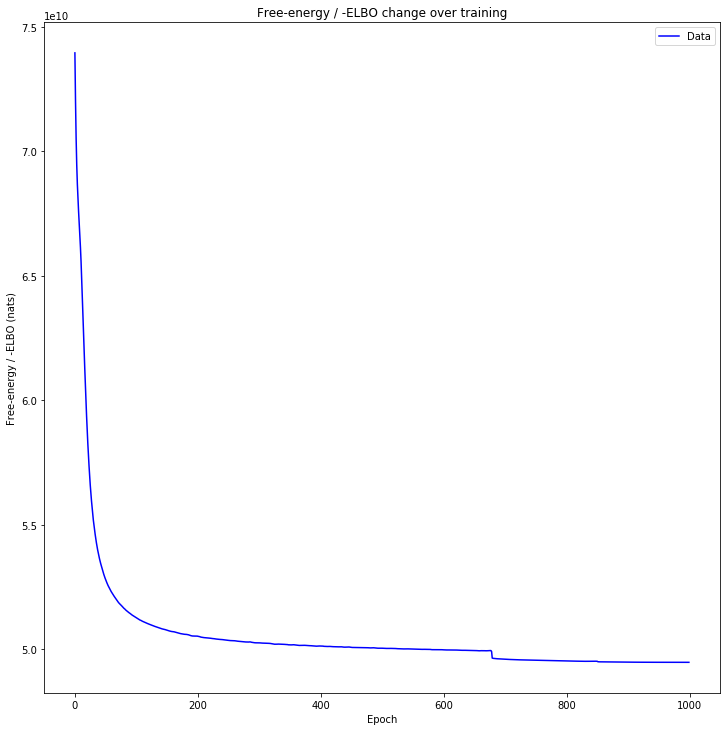

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


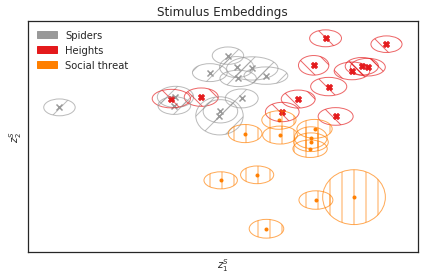

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


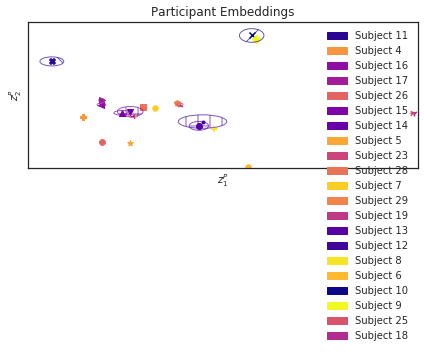

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

05/21/2020 06:21:11 Plotting factors for Participant 14, run 1


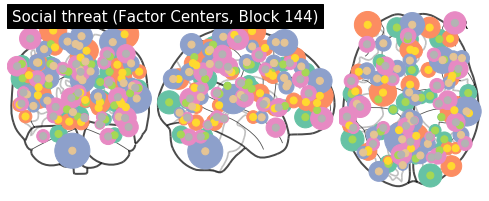

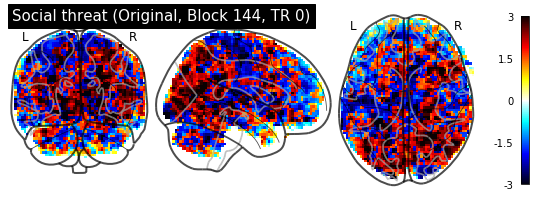

05/21/2020 06:21:15 Reconstruction Error (Frobenius Norm): 1.78507233e+02 out of 1.51073608e+03


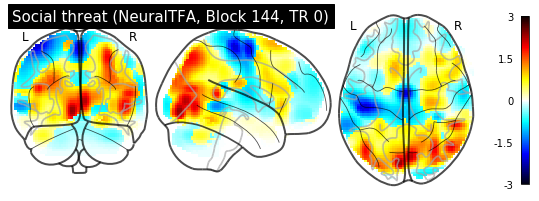

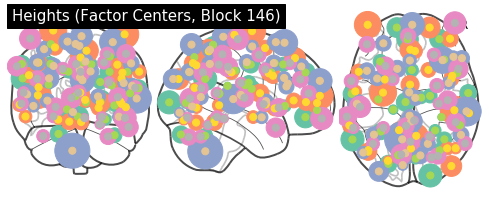

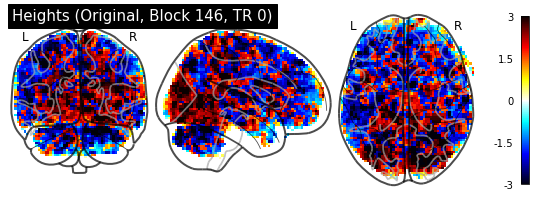

05/21/2020 06:21:20 Reconstruction Error (Frobenius Norm): 1.54480438e+02 out of 1.43003699e+03


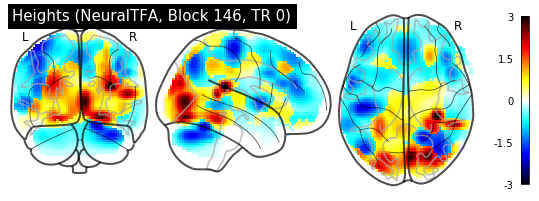

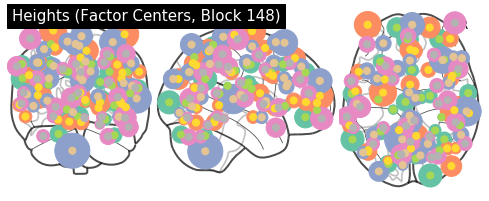

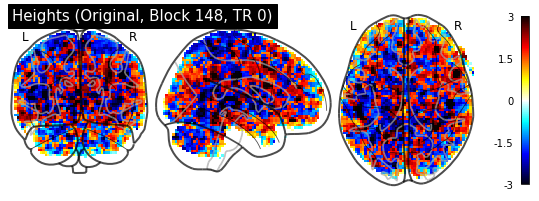

05/21/2020 06:21:24 Reconstruction Error (Frobenius Norm): 2.12789139e+02 out of 1.35410339e+03


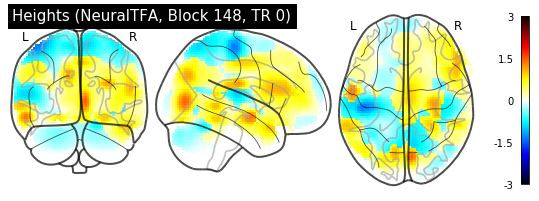

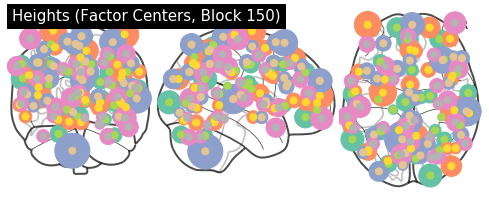

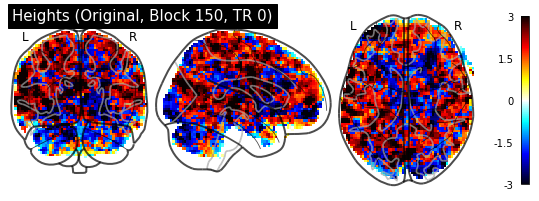

05/21/2020 06:21:29 Reconstruction Error (Frobenius Norm): 2.22381744e+02 out of 1.46802747e+03


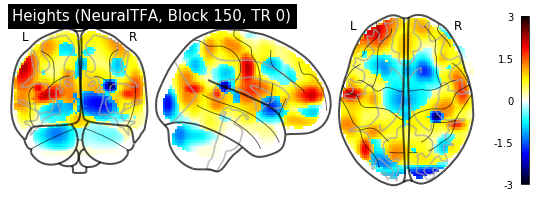

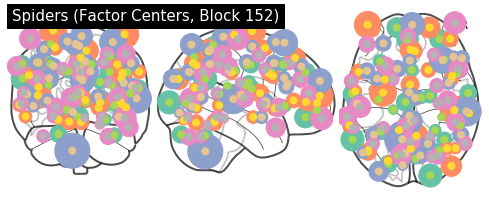

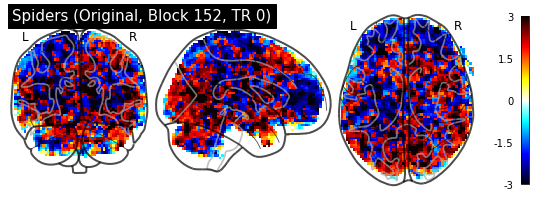

05/21/2020 06:21:33 Reconstruction Error (Frobenius Norm): 1.64713043e+02 out of 1.40791223e+03


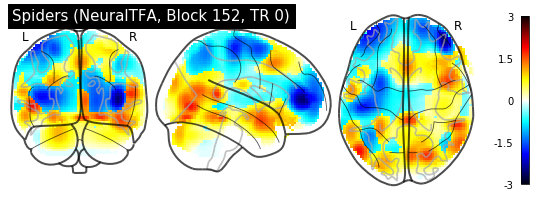

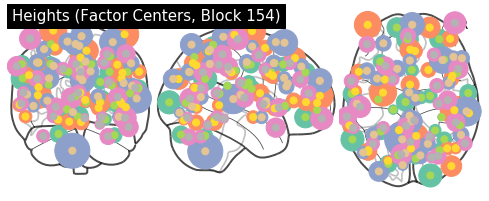

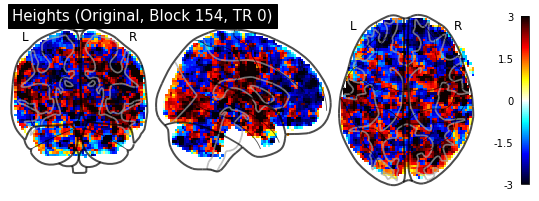

05/21/2020 06:21:38 Reconstruction Error (Frobenius Norm): 1.81334091e+02 out of 1.51217200e+03


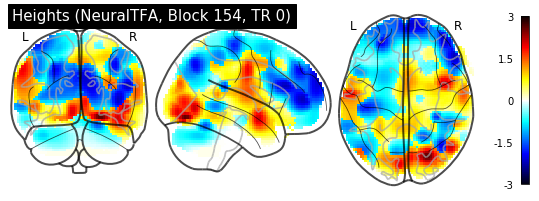

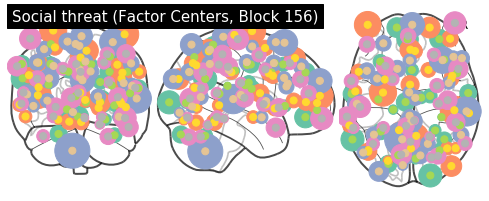

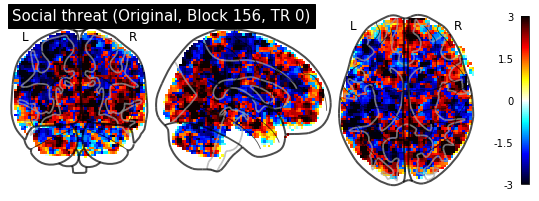

05/21/2020 06:21:43 Reconstruction Error (Frobenius Norm): 1.60248657e+02 out of 1.51101672e+03


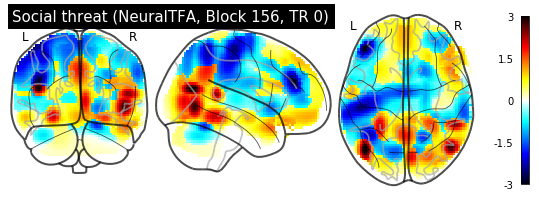

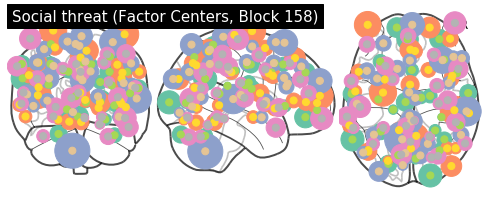

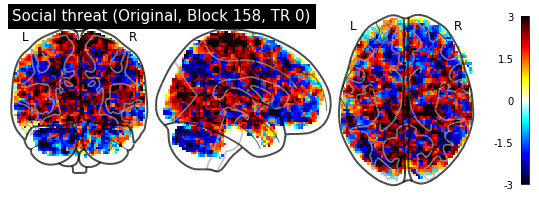

05/21/2020 06:21:47 Reconstruction Error (Frobenius Norm): 1.77009018e+02 out of 1.41128918e+03


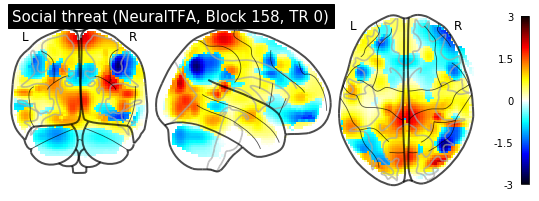

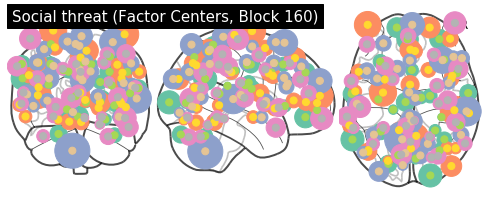

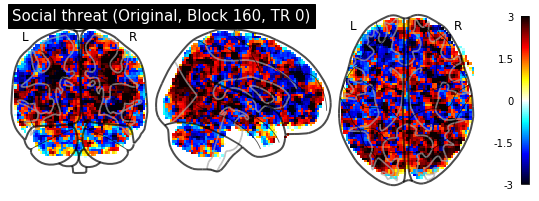

05/21/2020 06:21:52 Reconstruction Error (Frobenius Norm): 1.51252106e+02 out of 1.40180969e+03


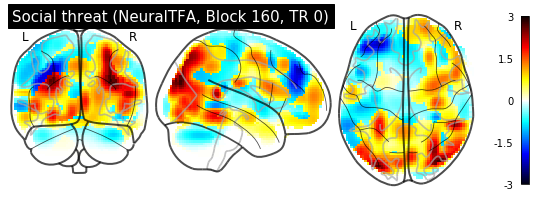

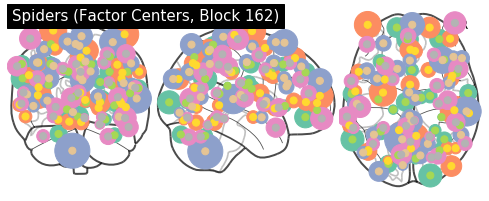

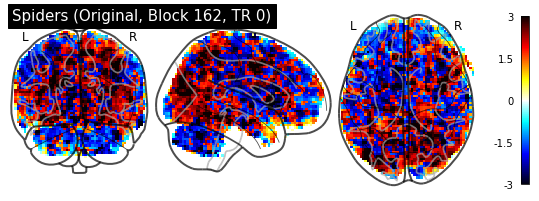

05/21/2020 06:21:57 Reconstruction Error (Frobenius Norm): 1.76927719e+02 out of 1.36783508e+03


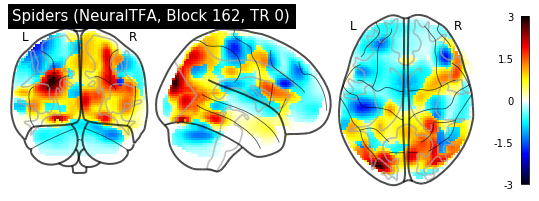

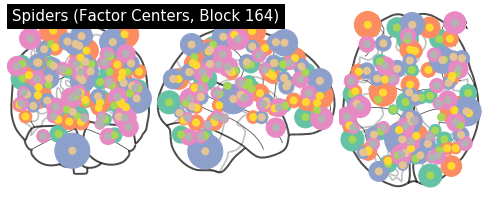

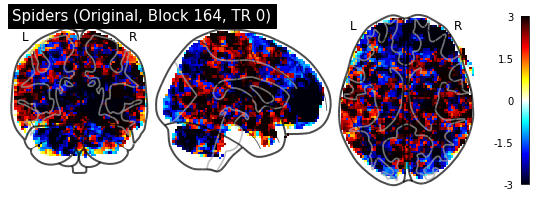

05/21/2020 06:22:01 Reconstruction Error (Frobenius Norm): 2.07620956e+02 out of 1.54889282e+03


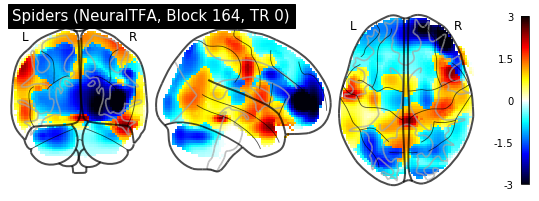

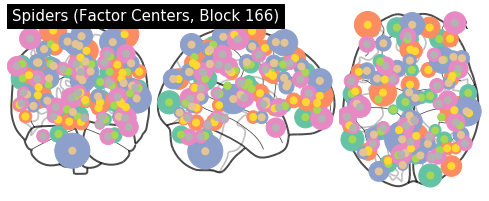

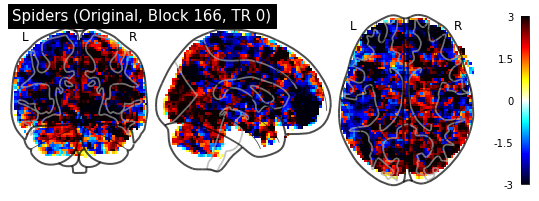

05/21/2020 06:22:06 Reconstruction Error (Frobenius Norm): 1.77963837e+02 out of 1.50593921e+03


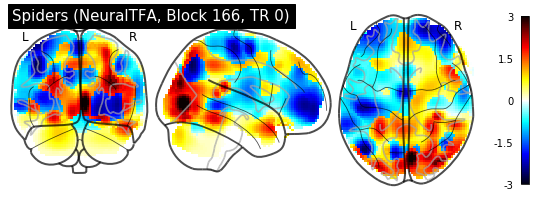

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)


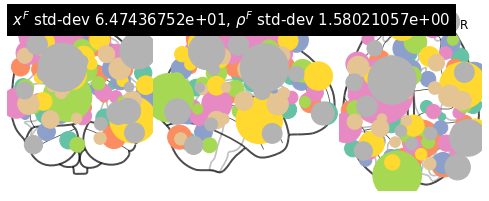

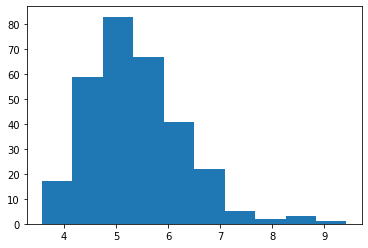

(<nilearn.plotting.displays.OrthoProjector at 0x7fa48937bdd0>,
 tensor([[-5.9989e+01, -6.7169e+01,  1.9489e+01],
         [ 5.2633e+01,  2.9239e+01, -3.7260e+00],
         [ 3.3493e+01, -3.3927e+01,  2.1002e+01],
         [-2.0295e+01, -3.9850e+01,  7.1879e+01],
         [-1.1073e-01,  3.2228e+01,  3.0300e+01],
         [-1.2270e+01, -7.6990e+01, -3.6457e+01],
         [-3.4980e+01,  6.9447e+01, -7.6647e+00],
         [-7.7510e-01, -8.9001e+01,  1.4384e+01],
         [-2.7141e+01, -7.9464e+00,  2.4241e+01],
         [ 6.6311e+01, -2.1289e+01,  3.4266e+01],
         [-1.7195e+01, -2.3834e+01,  3.8069e+01],
         [ 2.6124e+01, -5.9347e+01, -1.3159e+01],
         [ 1.7556e+01, -2.3258e+01,  3.6191e+01],
         [-3.1860e+01,  2.5449e+01,  4.2154e+01],
         [ 1.1743e+01, -5.7366e+01,  7.1976e+01],
         [ 3.5451e+01, -8.4568e+01, -3.2676e+01],
         [ 2.1208e+01,  5.9063e+01,  3.2525e+01],
         [ 5.1760e+00, -8.0734e+01, -2.0828e+00],
         [-2.9727e+00,  5.2990e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

05/21/2020 06:22:58 Average reconstruction error (MSE): 9.49023276e-01
05/21/2020 06:22:58 Average data norm (Euclidean): 1.09839495e+00
05/21/2020 06:22:58 Percent average reconstruction error: 0.304642


(0.9490232764969699, 1.0983949463766804, 0.0030464249384241893)

In [36]:
dtfa.average_reconstruction_error(weighted=False, blocks_filter=affvids_db.inference_filter(training=True))

05/21/2020 11:30:23 Average reconstruction error (MSE): 1.21623547e+03 +/- 4.73887826e+01
05/21/2020 11:30:23 Average data norm (Euclidean): 1.41246504e+03 +/- 8.13384631e+01
05/21/2020 11:30:23 Percent average reconstruction error: 86.241954 +/- 3.14807722e+00


(array([1242.67163086, 1169.71203613, 1262.97705078, 1251.64733887,
        1216.49731445, 1276.10620117, 1170.9855957 , 1253.79870605,
        1223.23852539, 1203.25109863, 1262.47851562, 1284.51171875,
        1177.80639648, 1232.80761719, 1250.49658203, 1193.77185059,
        1231.28161621, 1229.15405273, 1232.27050781, 1235.37145996,
        1235.05505371, 1240.64916992, 1224.7869873 , 1236.30651855,
        1226.36657715, 1286.75915527, 1184.39880371, 1291.48132324,
        1285.75512695, 1268.68676758, 1251.81201172, 1224.58081055,
        1198.02026367, 1201.13500977, 1205.5357666 , 1236.9017334 ,
        1191.46826172, 1235.58947754, 1209.8190918 , 1158.4831543 ,
        1219.46496582, 1330.01928711, 1220.88232422, 1215.12536621,
        1308.56164551, 1380.30895996, 1210.48339844, 1196.86169434,
        1142.49536133, 1211.1574707 , 1240.98706055, 1217.59143066,
        1324.16918945, 1210.34338379, 1273.27563477, 1229.61108398,
        1179.96264648, 1199.96838379, 1164.86779

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


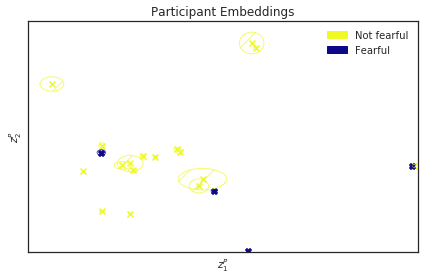

In [37]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


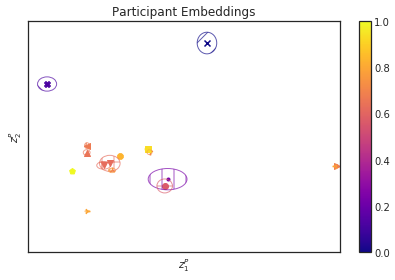

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


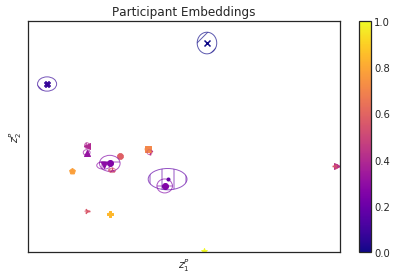

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


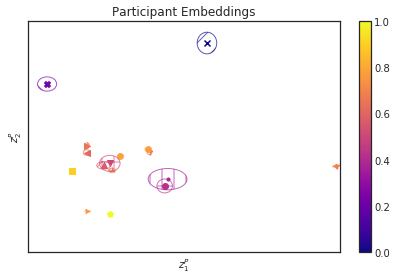

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


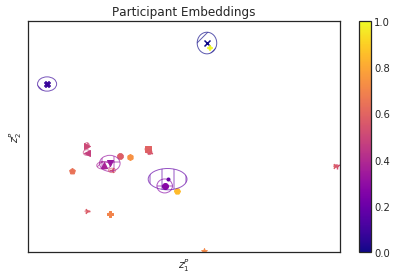

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')